# Task 2: Credit Risk Prediction using Logistic Regression
### Problem Statement
Build a classification model to predict loan default likelihood based on applicant information.


# Import Libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load the Dataset

In [36]:
df = pd.read_csv('loan_prediction_train.csv')
df.columns = df.columns.str.strip()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Handle Missing Values

In [37]:
df.ffill(inplace=True)
df.dropna(inplace=True)
print("Missing values left:", df.isnull().sum().sum())

Missing values left: 0


# Encode Categorical Columns

In [38]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'Loan_ID':
        df[col] = le.fit_transform(df[col])

# Exploratory Data Analysis

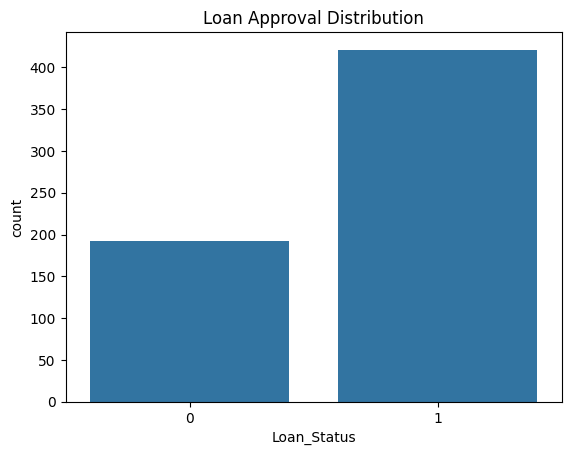

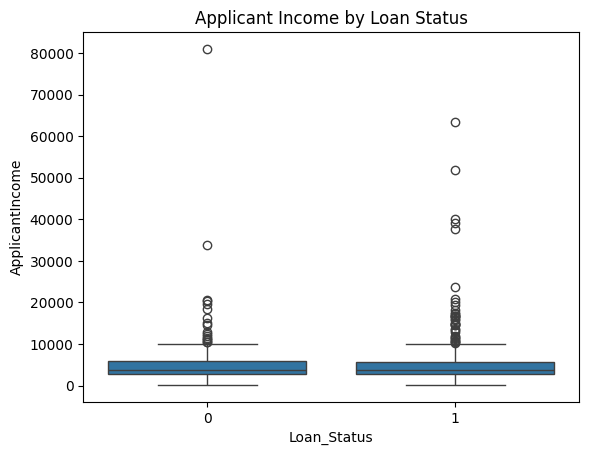

In [39]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.show()

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Loan Status")
plt.show()

# Prepare Features and Labels

In [40]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Scale the Features

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Scaled Data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Model

In [43]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

# Evaluate the Model

In [44]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7967479674796748
Confusion Matrix:
 [[15 22]
 [ 3 83]]
